In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import qbo_utils as qbo
from CASutils import plotting_utils as myplots
from CASutils import colorbar_utils as cbars

from scipy.ndimage import gaussian_filter

import sys

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/SUPP/"

In [3]:
def smoothcospec(dat, sigma=1):
    # fill in k=0 with the average of adjacent values for the purposes of smoothing
    datfill = (dat.sel(k=-1).values + dat.sel(k=1))/2.
    dat = dat.where( dat.k != 0, datfill )
    # drop w=0
    dat = dat.where( dat.w !=0, drop=True)
    dat_smooth = gaussian_filter(dat, sigma=sigma)
    dat_smooth = xr.DataArray(dat_smooth, coords=dat.coords, dims=dat.dims)
    return dat_smooth

In [4]:
dcurves = xr.open_dataset("/project/cas/islas/python_savs/L83_paper/DATA_SORT/dispersion_curves/dispersion_curves.nc")
def oplot_dcurves(ax, dcurves, component='symmetric'):
    if (component == "symmetric"):
        for i in np.arange(0,dcurves.h_e.size,1):
            ax.plot(dcurves.k, dcurves.w_kelvin.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_ig_n1.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_etrap.isel(h_e=i), color='gray')
    else:
        for i in np.arange(0,dcurves.h_e.size,1):
            ax.plot(dcurves.k, dcurves.w_mrg.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_ig_n2.isel(h_e=i), color='gray')
    return ax

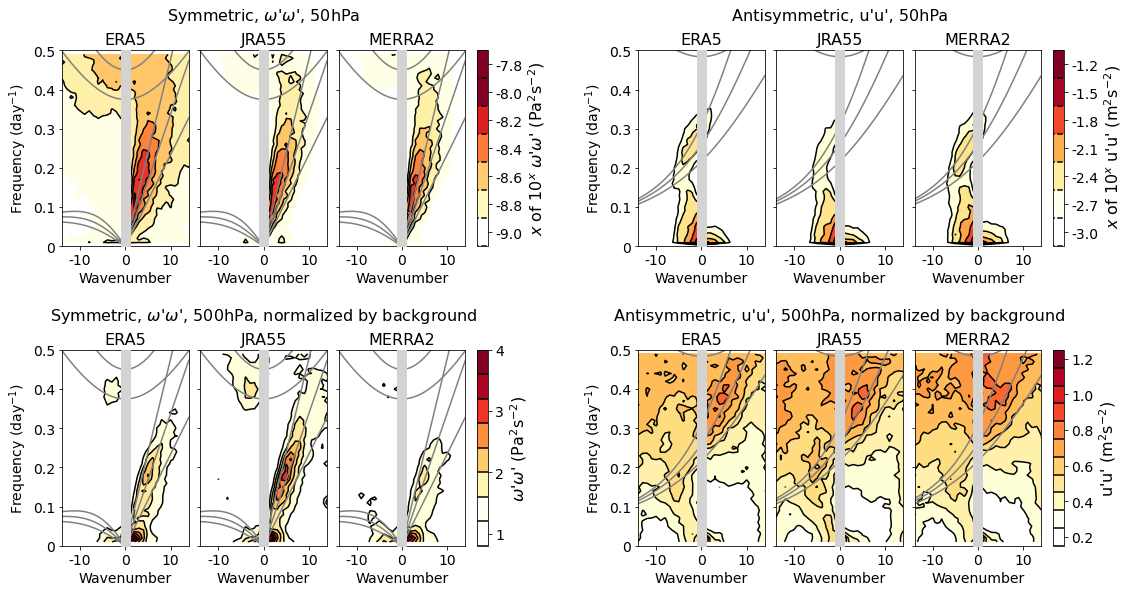

In [13]:
fig = plt.figure(figsize=(16,16))
xlim=14

#---symmetric omega at 50 hPa
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/WKdiags/"
p=50 ; lat=5
era5 = xr.open_dataset(basepath+'ERA5_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
jra55 = xr.open_dataset(basepath+'JRA55_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
merra2 = xr.open_dataset(basepath+'MERRA2_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')

ci = 0.2 ; cmin=-9 ; cmax=-8

component='symmetric'

y1=0.8 ; y2=0.97

ax = myplots.plotWK(fig, np.log10(era5.cospec_latavg.sel(component=component)), era5.k, era5.w, ci, cmin, cmax,
                    'ERA5',0.,0.11,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(jra55.cospec_latavg.sel(component=component)), jra55.k, jra55.w, ci, cmin, cmax,
                    'JRA55',0.12,0.23,y1, y2, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(merra2.cospec_latavg.sel(component=component)), merra2.k, merra2.w, ci, cmin, cmax,
                    'MERRA2',0.24,0.35,y1, y2, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = cbars.plotcolorbar_log10(fig, ci, cmin, cmax,"$x$ of 10$^{x}$ $\omega$'$\omega$' (Pa$^{2}$s$^{-2}$)", 0.36,0.37,y1,y2,orient='vertical', contourlines=True,
                              posonly=True, ticklabel10=False, fsize=14)

fig.text(0.175,y2+0.03,"Symmetric, $\omega$'$\omega$', 50hPa", fontsize=16, ha='center', va='center')


#---antisymmetric U at 50 hPa
#---symmetric omega at 50 hPa
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/WKdiags/"
p=50 ; lat=5
era5 = xr.open_dataset(basepath+'U_ERA5_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
jra55 = xr.open_dataset(basepath+'U_JRA55_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
merra2 = xr.open_dataset(basepath+'U_MERRA2_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')

ci=0.3 ; cmin=-3 ; cmax=-1.4
component='antisymmetric'
y1=0.8 ; y2=0.97

ax = myplots.plotWK(fig, np.log10(era5.cospec_latavg.sel(component=component)), era5.k, era5.w, ci, cmin, cmax,
                    'ERA5',0.5,0.61,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(jra55.cospec_latavg.sel(component=component)), jra55.k, jra55.w, ci, cmin, cmax,
                    'JRA55',0.62,0.73,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(merra2.cospec_latavg.sel(component=component)), merra2.k, merra2.w, ci, cmin, cmax,
                    'MERRA2',0.74,0.85,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = cbars.plotcolorbar_log10(fig, ci, cmin, cmax," $x$ of 10$^{x}$ u'u' (m$^{2}$s$^{-2}$)", 0.86,0.87,y1,y2,orient='vertical', contourlines=True,
                              posonly=True, ticklabel10=False, fsize=14)

fig.text(0.675,y2+0.03,"Antisymmetric, u'u', 50hPa", fontsize=16, ha='center', va='center')




basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/WKdiags/"
p=500 ; lat=5
component='symmetric'

era5 = xr.open_dataset(basepath+'ERA5_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
jra55 = xr.open_dataset(basepath+'JRA55_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
merra2 = xr.open_dataset(basepath+'MERRA2_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')


y1=0.54 ; y2=0.71
ci=0.4 ; cmin=1 ; cmax=3.6
sig=0.5

dat = era5.cospec_latavg.sel(component=component)/era5.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'ERA5',0.,0.11,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = jra55.cospec_latavg.sel(component=component)/jra55.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'JRA55',0.12,0.23,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

dat = merra2.cospec_latavg.sel(component=component)/merra2.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'MERRA2',0.24,0.35,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = cbars.plotcolorbar(fig, ci, cmin, cmax,"$\omega$'$\omega$' (Pa$^{2}$s$^{-2}$)", 0.36,0.37,y1,y2,orient='vertical', contourlines=True,
                              posonly='True', fsize=14)

fig.text(0.175,y2+0.03,"Symmetric, $\omega$'$\omega$', 500hPa, normalized by background", fontsize=16, ha='center', va='center')





#-antisymmetric U at 500 hPa
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/WKdiags/"
p=500 ; lat=5
y1=0.54 ; y2=0.71
ci=0.1 ; cmin=0.2 ; cmax=1.2

era5 = xr.open_dataset(basepath+'U_ERA5_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
jra55 = xr.open_dataset(basepath+'U_JRA55_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')
merra2 = xr.open_dataset(basepath+'U_MERRA2_'+str(p)+'hpa_'+str(lat)+'Sto'+str(lat)+'N.nc')

component='antisymmetric'

sig=0.5
dat = era5.cospec_latavg.sel(component=component)/era5.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'ERA5',0.5,0.61,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)


dat = jra55.cospec_latavg.sel(component=component)/jra55.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'JRA55',0.62,0.73,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)


dat = merra2.cospec_latavg.sel(component=component)/merra2.background
datsmooth = smoothcospec(dat, sigma=sig)
ax = myplots.plotWK(fig, datsmooth, datsmooth.k, datsmooth.w, ci, cmin, cmax,
                    'MERRA2',0.74,0.85,y1,y2,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True, ylabel=False)
ax = oplot_dcurves(ax, dcurves, component=component)


ax = cbars.plotcolorbar(fig, ci, cmin, cmax,"u'u' (m$^{2}$s$^{-2}$)", 0.86,0.87,y1,y2,orient='vertical', contourlines=True,
                              posonly='True', fsize=14)

fig.text(0.675,y2+0.03,"Antisymmetric, u'u', 500hPa, normalized by background", fontsize=16, ha='center', va='center')

fig.savefig(plotpath+'figS5.pdf', bbox_inches='tight', facecolor='white')